In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Load the dataset
data = pd.read_csv('Unemployment in India.csv')


In [2]:
data.dropna(inplace=True)

In [7]:
X = data.drop(columns=[" estimatedunemploymentrate ","Region"])
X = pd.get_dummies(X)
y = data[" estimatedunemploymentrate "]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Model evaluation
# Predictions on the testing set
lr_pred = lr_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)

In [13]:
# Evaluation metrics
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

In [14]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [15]:

print("Linear Regression Metrics:")
print(f"MSE: {lr_mse}")
print(f"RMSE: {lr_rmse}")
print(f"MAE: {lr_mae}")
print(f"R-squared: {lr_r2}")

Linear Regression Metrics:
MSE: 99.80020921699004
RMSE: 9.990005466314322
MAE: 6.9172618143139895
R-squared: 0.31066591391837106


In [16]:
print("\nRandom Forest Metrics:")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"MAE: {rf_mae}")
print(f"R-squared: {rf_r2}")


Random Forest Metrics:
MSE: 92.78222423966218
RMSE: 9.632352996005814
MAE: 5.686372297297297
R-squared: 0.35914012352611324


In [17]:
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                                     Feature  Importance
0                         Estimated Employed    0.473537
1    Estimated Labour Participation Rate (%)    0.270555
11                          Date_ 31-05-2020    0.094300
3                           Date_ 30-04-2020    0.084596
7                           Date_ 30-11-2019    0.009286
5                           Date_ 30-06-2020    0.008671
16                        Frequency_ Monthly    0.007900
18                                Area_Rural    0.007637
19                                Area_Urban    0.006305
17                         Frequency_Monthly    0.005516
9                           Date_ 31-03-2020    0.005456
12                          Date_ 31-07-2019    0.004615
13                          Date_ 31-08-2019    0.004026
15                          Date_ 31-12-2019    0.003490
2                           Date_ 29-02-2020    0.002917
8                           Date_ 31-01-2020    0.002765
14        

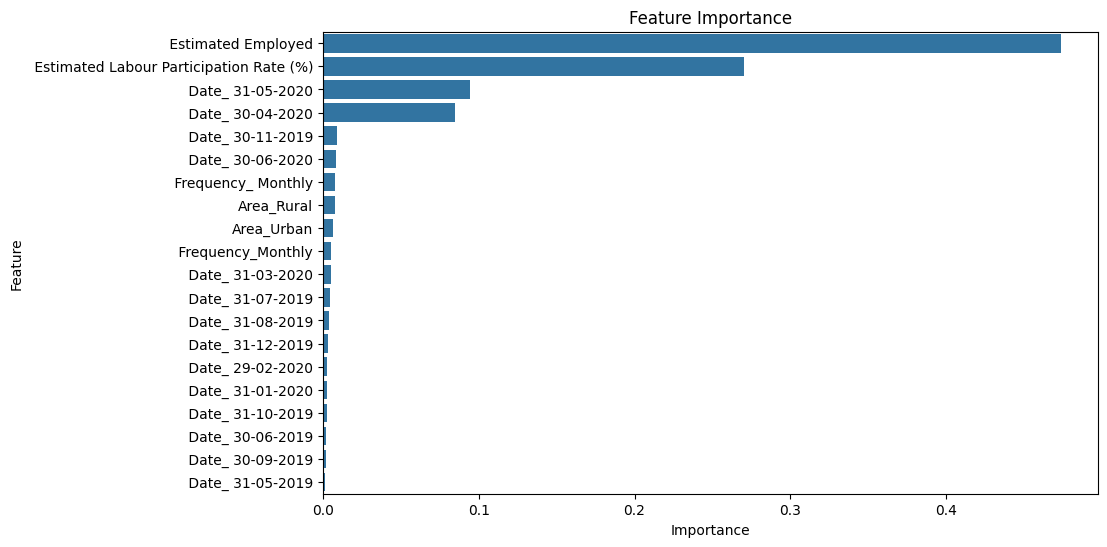

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()